## Writeup Template
### You can use this file as a template for your writeup if you want to submit it as a markdown file, but feel free to use some other method and submit a pdf if you prefer.

---

**Vehicle Detection Project**

The goals / steps of this project are the following:

* Perform a Histogram of Oriented Gradients (HOG) feature extraction on a labeled training set of images and train a classifier Linear SVM classifier
* Optionally, you can also apply a color transform and append binned color features, as well as histograms of color, to your HOG feature vector. 
* Note: for those first two steps don't forget to normalize your features and randomize a selection for training and testing.
* Implement a sliding-window technique and use your trained classifier to search for vehicles in images.
* Run your pipeline on a video stream (start with the test_video.mp4 and later implement on full project_video.mp4) and create a heat map of recurring detections frame by frame to reject outliers and follow detected vehicles.
* Estimate a bounding box for vehicles detected.

[//]: # (Image References)
[image1]: ./examples/car_not_car.png
[image2]: ./examples/HOG_example.jpg
[image3]: ./examples/sliding_windows.jpg
[image4]: ./examples/sliding_window.jpg
[image5]: ./examples/bboxes_and_heat.png
[image6]: ./examples/labels_map.png
[image7]: ./examples/output_bboxes.png
[video1]: ./project_video.mp4


## [Rubric](https://review.udacity.com/#!/rubrics/513/view) Points
### Here I will consider the rubric points individually and describe how I addressed each point in my implementation.  

---
### Writeup / README

#### 1. Provide a Writeup / README that includes all the rubric points and how you addressed each one.  You can submit your writeup as markdown or pdf.  [Here](https://github.com/udacity/CarND-Vehicle-Detection/blob/master/writeup_template.md) is a template writeup for this project you can use as a guide and a starting point.  

You're reading it!


### Histogram of Oriented Gradients (HOG)

#### 1. Explain how (and identify where in your code) you extracted HOG features from the training images.

The code for this step is contained  in lines #28 through #48 in function 'get_hog_features()' of the file called `main.py`.  


I started by reading in all the `vehicle` and `non-vehicle` images.  Here is an example of one of each of the `vehicle` and `non-vehicle` classes:
##### Vehicles
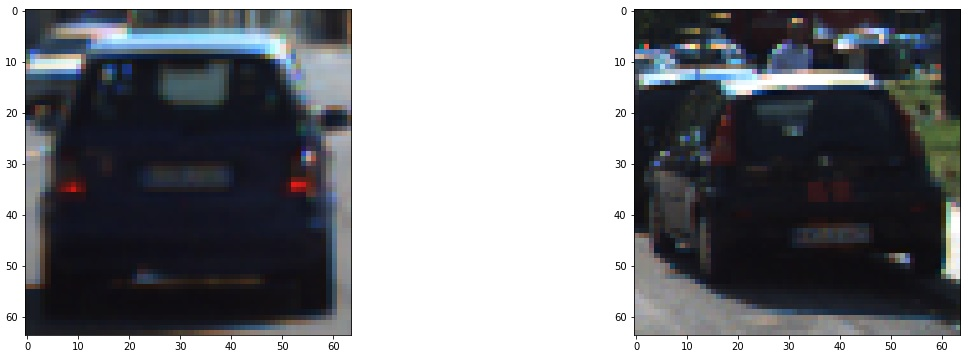
##### Non Vehicles
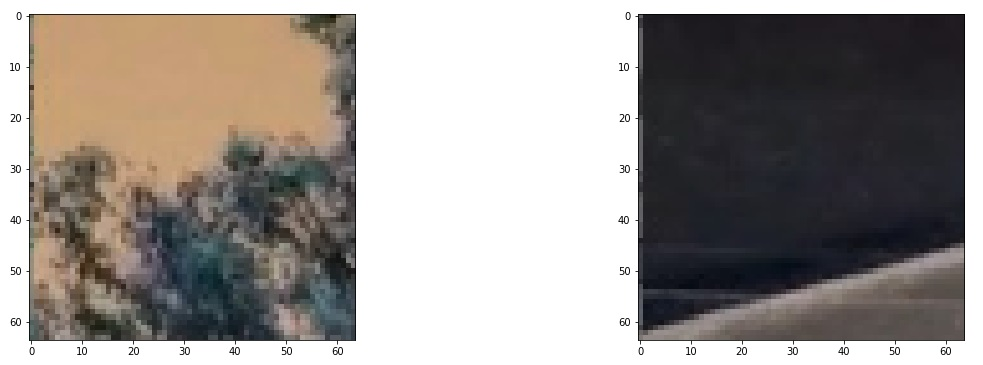

I then explored different color spaces and different `skimage.feature.hog()` parameters (`orientations`, `pixels_per_cell`, and `cells_per_block`).  I grabbed random images from each of the two classes and displayed them to get a feel for what the `skimage.feature.hog()` output looks like.

Here is an example using the `YCrCb` color space and HOG parameters of `orientations=9`, `pixels_per_cell=(12, 12)` and `cells_per_block=(2, 2)`:


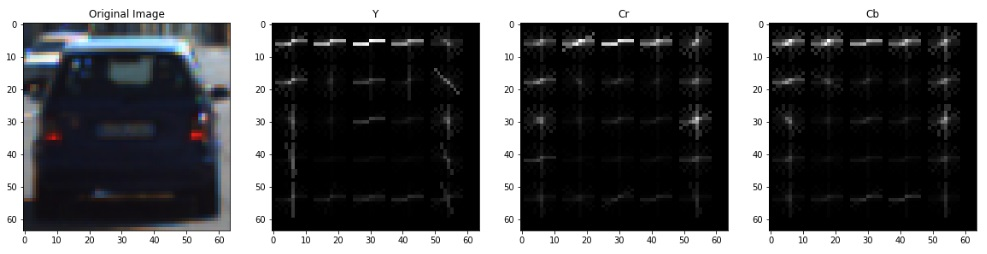

#### 2. Explain how you settled on your final choice of HOG parameters.

I tried various combinations of parameters and i settled these parameters with intuition.

#### 3. Describe how (and identify where in your code) you trained a classifier using your selected HOG features (and color features if you used them).

The code related to training is stated at line 211 in 'train()' in 'main.py' file.
First i have loaded vehicles and Non-vehicle images and shuffled my data .Then i extracted 3 types of features:
1. Spatial binned image features
2. Color histogram features
3. Hog features


After extracting features  ,i have combined these features and splitted it into training and testing data into ratio of 5:1 ,then i normalise my training and testing data .Finally i have passed data to linear SVM classifier to get it trained.


### Sliding Window Search

#### 1. Describe how (and identify where in your code) you implemented a sliding window search.  How did you decide what scales to search and how much to overlap windows?

I have implemented sliding window on image portion of  400px to 656px  horizontally.I have decided to use scales of   [1, 1.25, 1.5, 2.5,3]  because the size of vehicles are varing on different ranges .

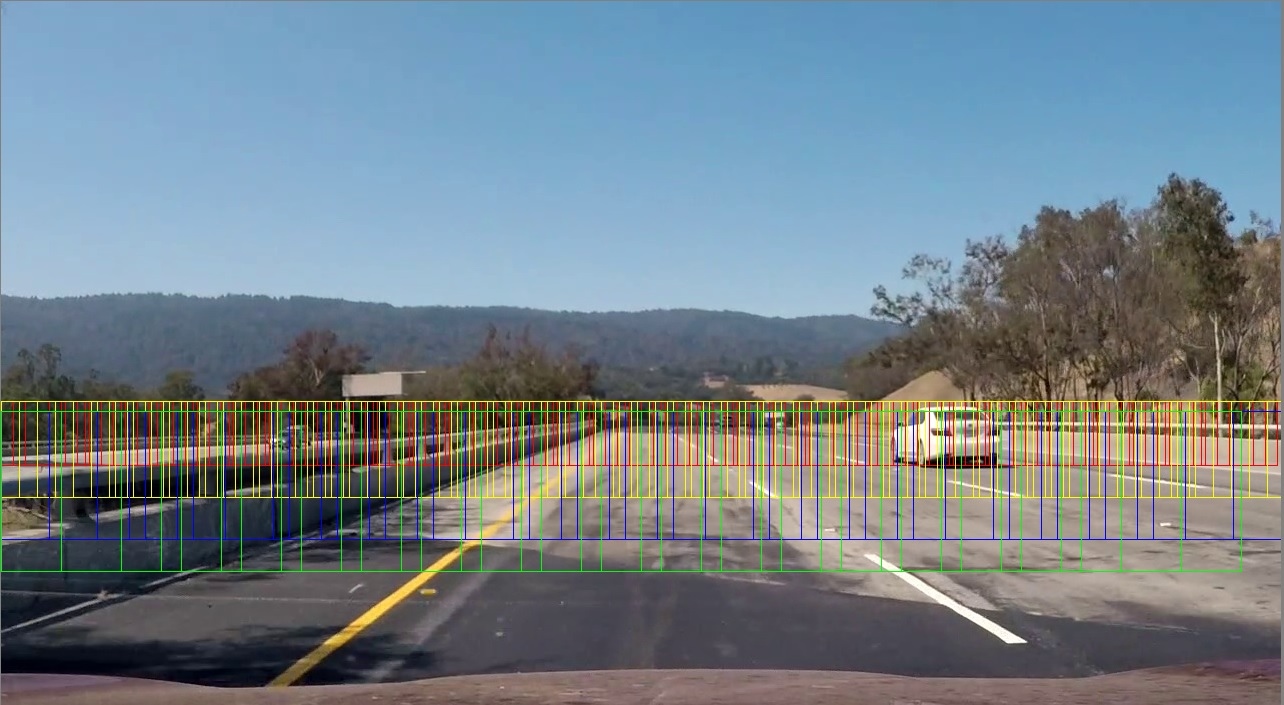
#### 2. Show some examples of test images to demonstrate how your pipeline is working.  What did you do to optimize the performance of your classifier?

Ultimately I searched on 4 scales using YCrCb 3-channel HOG features plus spatially binned color and histograms of color in the feature vector, which provided a nice result but there were few false positives .To handle false positves i have taken historical data of past 15 frames and then applied thresholding to remove false positives .Here are some example images:

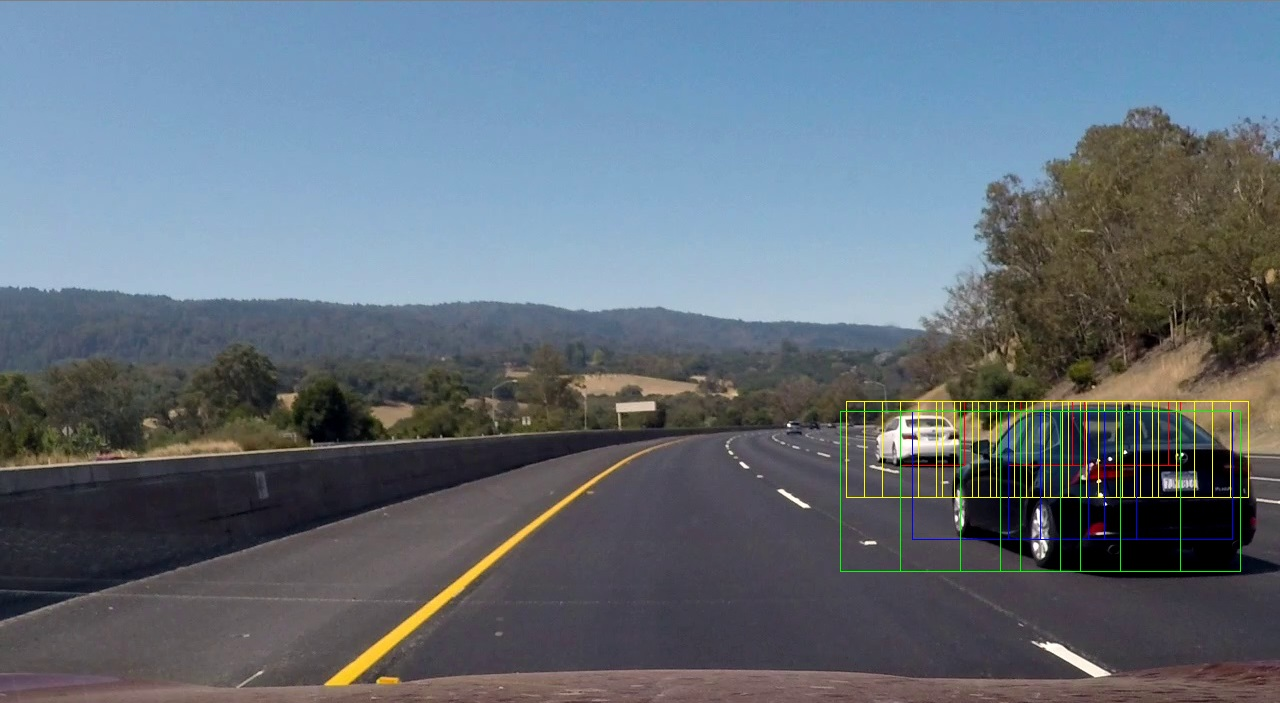---


### Video Implementation

#### 1. Provide a link to your final video output.  Your pipeline should perform reasonably well on the entire project video (somewhat wobbly or unstable bounding boxes are ok as long as you are identifying the vehicles most of the time with minimal false positives.)
Here's a [link to my video result](./output.mp4)


#### 2. Describe how (and identify where in your code) you implemented some kind of filter for false positives and some method for combining overlapping bounding boxes.

I recorded the positions of positive detections in each frame of the video.  From the positive detections I created a heatmap .Then i stored my current heatmap to update my  historical frame data .Finally i have done averaging on historical 15 frames data and thresholded that map to identify vehicle positions.  I then used `scipy.ndimage.measurements.label()` to identify individual blobs in the heatmap.  I then assumed each blob corresponded to a vehicle.  I constructed bounding boxes to cover the area of each blob detected.  

Here's an example result showing the heatmap from a series of frames of video, the result of `scipy.ndimage.measurements.label()` and the bounding boxes then overlaid on the last frame of video:

### Here are six frames and their corresponding heatmaps:
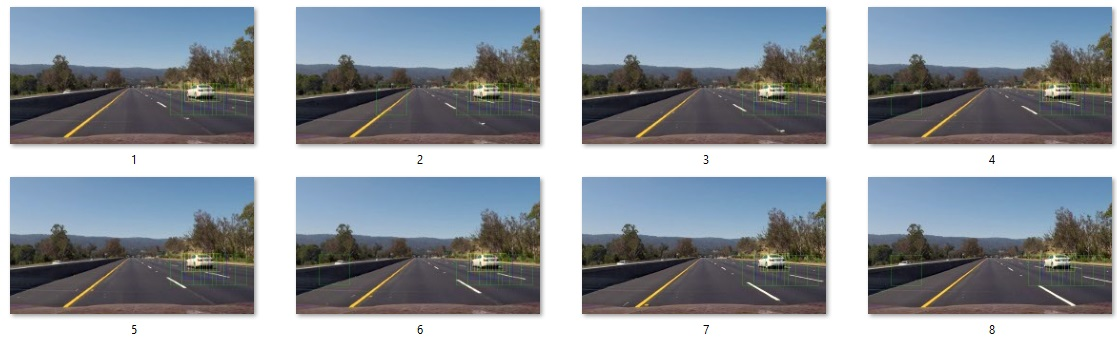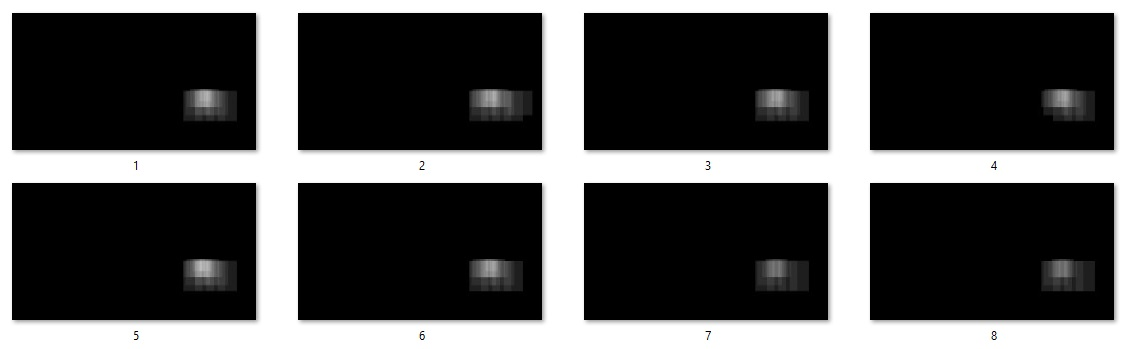


### Here the resulting bounding boxes are drawn after getting output from  `scipy.ndimage.measurements.label()`
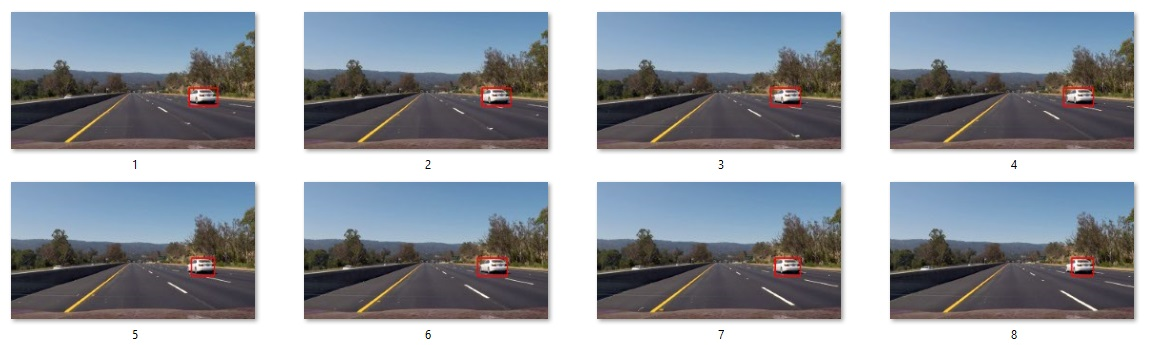


---

### Discussion

#### 1. Briefly discuss any problems / issues you faced in your implementation of this project.  Where will your pipeline likely fail?  What could you do to make it more robust?





The classifier does not perform well on current data features.There are many false positives ,so i have to use historical data to remove false positives .Moreover my calssifier does not perform well on RGB space ,then i switched to YCrCb color space.This pipline will not give good results in real world scenerios due to bad hog features and limitations with SVM classifier.SVM claasifier is really time consuming to work in real world scenerio.

We can try YOLO or SSD algorithms to detect different objects in real world .